# 1. 기본설정
## (1) 라이브러리

In [1]:
########################### 1. 기본 설정 ##########################
import time
start_time = time.time()

import os
import pandas as pd
import numpy as np
import copy

######################### 2. 데이터 전처리 ########################
### (1) 데이터 증강 

from PIL import Image
from PIL import ImageFilter
from matplotlib import pyplot as plt
import tensorflow_hub as hub

import math
### (3) 데이터 분리 


#################### 3. 모델 학습 및 결과 검증 ####################
### (1) 모델 설계 및 대표 벡터 추출 

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, concatenate
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

### (2) 분류 예측 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.cluster import KMeans

import seaborn as sns
from sklearn.manifold import TSNE

## (2) 파라미터 설정

In [2]:
########################### 1. 기본 설정 ##########################


######################### 2. 데이터 전처리 ########################
### (1) 데이터 증강 

upsize_factor = 0  # 0: 1배, 1: 4배, 2:16배... 1올라갈 때마다 4배씩 증가. 아직은 1만 유효.

blur_filter = False
contour_filter = False
edge_enhance_filter = False 
gradient_magnitude_filter = True     # oriented gradient의 세기 이미지
gradient_angle_filter = True         # oriented gradient의 각도 이미지
max_intensity_filter = True          # 좌/우 최대치 픽셀만 남긴 이미지


filter_num = 0  # 위에서 설정한 필터의 사용 개수(True의 개수)에 따라 자동 변경. 건드리지 말 것.

if blur_filter == True:
    filter_num += 1
if contour_filter == True:
    filter_num += 1
if edge_enhance_filter == True:
    filter_num += 1
if gradient_magnitude_filter == True:
    filter_num += 1
if gradient_angle_filter == True:
    filter_num += 1
if max_intensity_filter == True: 
    filter_num += 1
    
### (3) 데이터 분리 

# tts_test_size = 0.2
# test_size = 0.15   # 1미만. val_size와의 합이 0.5를 넘지 않게.
# val_size = 0.15   # 1미만. test_size와의 합이 0.5를 넘지 않게.

train_test_split_randomstate = 5


#################### 3. 모델 학습 및 결과 검증 ####################
### (1) 모델 설계 및 대표 벡터 추출 
raw_image_size = 8
upsized_image_size = raw_image_size * (4 ** upsize_factor)
class_num = 6    # 대상 개수

is_global_feature = False  # Global feature 사용 여부 지정.
classes_num = 6
epoch_num = 20

### (2) 분류 예측 
classifier_random_state = 32



## (3) 데이터 로드

In [3]:
# data_dir = 'C:/Users/user/Documents/GitHub/Hackathon2022/Dataset/'  # Github 경로
data_dir = 'C:/Users/user/Google 드라이브/AIFFEL/+Final project/data/20220519/'  # Google drive 경로

# data1 부분 데이터 로드
data_path1_1 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po1.csv')
data1_1 = pd.read_csv(data_path1_1)

data_path1_2 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po2.csv')
data1_2 = pd.read_csv(data_path1_2)

data_path1_3 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po3.csv')
data1_3 = pd.read_csv(data_path1_3)

data_path1_4 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po4.csv')
data1_4 = pd.read_csv(data_path1_4)

data_path1_5 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po5.csv')
data1_5 = pd.read_csv(data_path1_5)

data_path1_6 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po6.csv')
data1_6 = pd.read_csv(data_path1_6)

data_path1_7 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po7.csv')
data1_7 = pd.read_csv(data_path1_7)

data_path1_8 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po8.csv')
data1_8 = pd.read_csv(data_path1_8)

data_path1_9 = os.path.join(data_dir, '8x8Test_20220519_11_Cham_HardWood_NoCushion_Po9.csv')
data1_9 = pd.read_csv(data_path1_9)


# data2 부분 데이터 로드
data_path2_1 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po1.csv')
data2_1 = pd.read_csv(data_path1_1)

data_path2_2 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po2.csv')
data2_2 = pd.read_csv(data_path1_2)

data_path2_3 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po3.csv')
data2_3 = pd.read_csv(data_path1_3)

data_path2_4 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po4.csv')
data2_4 = pd.read_csv(data_path1_4)

data_path2_5 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po5.csv')
data2_5 = pd.read_csv(data_path1_5)

data_path2_6 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po6.csv')
data2_6 = pd.read_csv(data_path1_6)

data_path2_7 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po7.csv')
data2_7 = pd.read_csv(data_path1_7)

data_path2_8 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po8.csv')
data2_8 = pd.read_csv(data_path1_8)

data_path2_9 = os.path.join(data_dir, '8x8Test_20220519_12_Moon_HardWood_NoCushion_Po9.csv')
data2_9 = pd.read_csv(data_path1_9)


# data3 부분 데이터 로드
data_path3_1 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po1.csv')
data3_1 = pd.read_csv(data_path3_1)

data_path3_2 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po2.csv')
data3_2 = pd.read_csv(data_path3_2)

data_path3_3 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po3.csv')
data3_3 = pd.read_csv(data_path3_3)

data_path3_4 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po4.csv')
data3_4 = pd.read_csv(data_path3_4)

data_path3_5 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po5.csv')
data3_5 = pd.read_csv(data_path3_5)

data_path3_6 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po6.csv')
data3_6 = pd.read_csv(data_path3_6)

data_path3_7 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po7.csv')
data3_7 = pd.read_csv(data_path3_7)

data_path3_8 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po8.csv')
data3_8 = pd.read_csv(data_path3_8)

data_path3_9 = os.path.join(data_dir, '8x8Test_20220519_13_Shin_HardWood_NoCushion_Po9.csv')
data3_9 = pd.read_csv(data_path3_9)


# data4 부분 데이터 로드
data_path4_1 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po1.csv')
data4_1 = pd.read_csv(data_path4_1)

data_path4_2 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po2.csv')
data4_2 = pd.read_csv(data_path4_2)

data_path4_3 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po3.csv')
data4_3 = pd.read_csv(data_path4_3)

data_path4_4 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po4.csv')
data4_4 = pd.read_csv(data_path4_4)

data_path4_5 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po5.csv')
data4_5 = pd.read_csv(data_path4_5)

data_path4_6 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po6.csv')
data4_6 = pd.read_csv(data_path4_6)

data_path4_7 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po7.csv')
data4_7 = pd.read_csv(data_path4_7)

data_path4_8 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po8.csv')
data4_8 = pd.read_csv(data_path4_8)

data_path4_9 = os.path.join(data_dir, '8x8Test_20220519_14_Lee_HardWood_NoCushion_Po9.csv')
data4_9 = pd.read_csv(data_path4_9)


# data5 부분 데이터 로드
data_path5_1 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po1.csv')
data5_1 = pd.read_csv(data_path5_1)

data_path5_2 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po2.csv')
data5_2 = pd.read_csv(data_path5_2)

data_path5_3 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po3.csv')
data5_3 = pd.read_csv(data_path5_3)

data_path5_4 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po4.csv')
data5_4 = pd.read_csv(data_path5_4)

data_path5_5 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po5.csv')
data5_5 = pd.read_csv(data_path5_5)

data_path5_6 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po6.csv')
data5_6 = pd.read_csv(data_path5_6)

data_path5_7 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po7.csv')
data5_7 = pd.read_csv(data_path5_7)

data_path5_8 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po8.csv')
data5_8 = pd.read_csv(data_path5_8)

data_path5_9 = os.path.join(data_dir, '8x8Test_20220519_15_LeeJea_HardWood_NoCushion_Po9.csv')
data5_9 = pd.read_csv(data_path5_9)


# data6 부분 데이터 로드
data_path6_1 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po1.csv')
data6_1 = pd.read_csv(data_path6_1)

data_path6_2 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po2.csv')
data6_2 = pd.read_csv(data_path6_2)

data_path6_3 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po3.csv')
data6_3 = pd.read_csv(data_path6_3)

data_path6_4 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po4.csv')
data6_4 = pd.read_csv(data_path6_4)

data_path6_5 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po5.csv')
data6_5 = pd.read_csv(data_path6_5)

data_path6_6 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po6.csv')
data6_6 = pd.read_csv(data_path6_6)

data_path6_7 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po7.csv')
data6_7 = pd.read_csv(data_path6_7)

data_path6_8 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po8.csv')
data6_8 = pd.read_csv(data_path6_8)

data_path6_9 = os.path.join(data_dir, '8x8Test_20220519_16_You_HardWood_NoCushion_Po9.csv')
data6_9 = pd.read_csv(data_path6_9)



In [4]:
# data1 = pd.concat([data1_1.iloc[:10], data1_2.iloc[:10], data1_3.iloc[:10], data1_4.iloc[:10],data1_5.iloc[:10],
#                  data1_6.iloc[:10], data1_7.iloc[:10], data1_8.iloc[:10], data1_9.iloc[:10]])  # 10개 행씩 추려 합침.
# data1['Label'] = 1 # Label 부여

# data2 = pd.concat([data2_1.iloc[:10], data2_2.iloc[:10], data2_3.iloc[:10], data2_4.iloc[:10],data2_5.iloc[:10],
#                  data2_6.iloc[:10], data2_7.iloc[:10], data2_8.iloc[:10], data2_9.iloc[:10]])  # 10개 행씩 추려 합침.
# data2['Label'] = 2 # Label 부여

# data3 = pd.concat([data3_1.iloc[:10], data3_2.iloc[:10], data3_3.iloc[:10], data3_4.iloc[:10],data3_5.iloc[:10],
#                  data3_6.iloc[:10], data3_7.iloc[:10], data3_8.iloc[:10], data3_9.iloc[:10]])  # 10개 행씩 추려 합침.
# data3['Label'] = 3 # Label 부여

# data4 = pd.concat([data4_1.iloc[:10], data4_2.iloc[:10], data4_3.iloc[:10], data4_4.iloc[:10],data4_5.iloc[:10],
#                  data4_6.iloc[:10], data4_7.iloc[:10], data4_8.iloc[:10], data4_9.iloc[:10]])  # 10개 행씩 추려 합침.
# data4['Label'] = 4 # Label 부여

# data5 = pd.concat([data5_1.iloc[:10], data5_2.iloc[:10], data5_3.iloc[:10], data5_4.iloc[:10],data5_5.iloc[:10],
#                  data5_6.iloc[:10], data5_7.iloc[:10], data5_8.iloc[:10], data5_9.iloc[:10]])  # 10개 행씩 추려 합침.
# data5['Label'] = 5 # Label 부여

# data6 = pd.concat([data6_1.iloc[:10], data6_2.iloc[:10], data6_3.iloc[:10], data6_4.iloc[:10],data6_5.iloc[:10],
#                  data6_6.iloc[:10], data6_7.iloc[:10], data6_8.iloc[:10], data6_9.iloc[:10]])  # 10개 행씩 추려 합침.
# data6['Label'] = 6 # Label 부여



data1 = pd.concat([data1_1.iloc[:50], data1_2.iloc[:50], data1_3.iloc[:50], data1_4.iloc[:50],data1_5.iloc[:50],
                 data1_6.iloc[:50], data1_7.iloc[:50], data1_8.iloc[:50], data1_9.iloc[:50]])  # 50개 행씩 추려 합침.
data1['Label'] = 1 # Label 부여

data2 = pd.concat([data2_1.iloc[:50], data2_2.iloc[:50], data2_3.iloc[:50], data2_4.iloc[:50],data2_5.iloc[:50],
                 data2_6.iloc[:50], data2_7.iloc[:50], data2_8.iloc[:50], data2_9.iloc[:50]])  # 50개 행씩 추려 합침.
data2['Label'] = 2 # Label 부여

data3 = pd.concat([data3_1.iloc[:50], data3_2.iloc[:50], data3_3.iloc[:50], data3_4.iloc[:50],data3_5.iloc[:50],
                 data3_6.iloc[:50], data3_7.iloc[:50], data3_8.iloc[:50], data3_9.iloc[:50]])  # 50개 행씩 추려 합침.
data3['Label'] = 3 # Label 부여

data4 = pd.concat([data4_1.iloc[:50], data4_2.iloc[:50], data4_3.iloc[:50], data4_4.iloc[:50],data4_5.iloc[:50],
                 data4_6.iloc[:50], data4_7.iloc[:50], data4_8.iloc[:50], data4_9.iloc[:50]])  # 50개 행씩 추려 합침.
data4['Label'] = 4 # Label 부여

data5 = pd.concat([data5_1.iloc[:50], data5_2.iloc[:50], data5_3.iloc[:50], data5_4.iloc[:50],data5_5.iloc[:50],
                 data5_6.iloc[:50], data5_7.iloc[:50], data5_8.iloc[:50], data5_9.iloc[:50]])  # 50개 행씩 추려 합침.
data5['Label'] = 5 # Label 부여

data6 = pd.concat([data6_1.iloc[:50], data6_2.iloc[:50], data6_3.iloc[:50], data6_4.iloc[:50],data6_5.iloc[:50],
                 data6_6.iloc[:50], data6_7.iloc[:50], data6_8.iloc[:50], data6_9.iloc[:50]])  # 50개 행씩 추려 합침.
data6['Label'] = 6 # Label 부여



In [5]:
print(type(data6))
print(data6.shape)
data6.head()

<class 'pandas.core.frame.DataFrame'>
(450, 65)


,FSR1,FSR2,FSR3,FSR4,FSR5,FSR6,FSR7,FSR8,FSR9,FSR10,...,FSR56,FSR57,FSR58,FSR59,FSR60,FSR61,FSR62,FSR63,FSR64,Label
0,0,0,0,0,0,0,0,0,0,23,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,25,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,24,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,26,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,28,...,0,0,0,0,0,0,0,0,0,6


In [6]:
# train_data = pd.concat([data1[:80], data2[:80], data3[:80], data4[:80], data5[:80], data6[:80]])  # 1~8번 자세
# test_data = pd.concat([data1[80:], data2[80:], data3[80:], data4[80:], data5[80:], data6[80:]])  # 9번 자세

train_data = pd.concat([data1[:400], data2[:400], data3[:400], data4[:400], data5[:400], data6[:400]])  # 1~8번 자세
test_data = pd.concat([data1[400:], data2[400:], data3[400:], data4[400:], data5[400:], data6[400:]])  # 9번 자세
# feature_data.shape

In [7]:
feature_train = train_data.iloc[:,:-1]
label_train = train_data.iloc[:, -1]
feature_test = test_data.iloc[:,:-1]
label_test = test_data.iloc[:, -1]
print(feature_train.shape)
print(label_train.shape)
print(feature_test.shape)
print(label_test.shape)

(2400, 64)
(2400,)
(300, 64)
(300,)


In [8]:
temp_array_feature_train = feature_train.to_numpy()

list_feature_train = []
for i in range(len(temp_array_feature_train)):
    reshaped_array = temp_array_feature_train[i].reshape(raw_image_size,raw_image_size)
    list_feature_train.append(reshaped_array)
    
array_feature_train = np.array(list_feature_train)
array_feature_train = array_feature_train.astype('uint8')

print("어레이 변환된 훈련 feature의 shape:", array_feature_train.shape)

temp_array_feature_test = feature_test.to_numpy()

list_feature_test = []
for i in range(len(temp_array_feature_test)):
    reshaped_array = temp_array_feature_test[i].reshape(raw_image_size,raw_image_size)
    list_feature_test.append(reshaped_array)
    
array_feature_test = np.array(list_feature_test)
array_feature_test = array_feature_test.astype('uint8')

print("어레이 변환된 테스트 feature의 shape:", array_feature_test.shape)

어레이 변환된 훈련 feature의 shape: (2400, 8, 8)
어레이 변환된 테스트 feature의 shape: (300, 8, 8)


In [9]:
array_feature_train[0,0]

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

데이터 이미지화


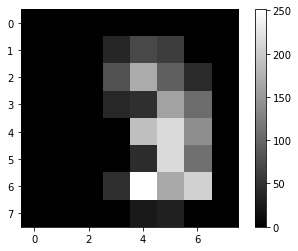

In [10]:
print('데이터 이미지화')
plt.imshow(array_feature_train[1] , cmap='gray')
plt.colorbar();

# 2. 데이터 전처리
## (1) 데이터 증강

### 이미지 리사이즈

In [11]:

print("사이즈 변경 전 이미지 크기: {}".format(array_feature_train[1].shape))
def image_upsize(array_feature, upsize_factor):
    
    SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1" 
    super_resolution_model = hub.load(SAVED_MODEL_PATH) # 3채널에서만 작동.
    tf_array_feature = tf.convert_to_tensor(array_feature)
    tf_array_feature = tf.cast(tf_array_feature, tf.float32) # uint8 -> float32
    upsized_array_feature = []
    for i, array in enumerate(tf_array_feature):
        
        # model은 3채널용이므로, 이미지를 1채널 -> 3채널로 확장
        temp_array = copy.deepcopy(array)
        temp_array = tf.expand_dims(temp_array, 2)
        temp_array = tf.expand_dims(temp_array, 0)
        temp_array_2 = copy.deepcopy(temp_array)
        temp_array_3 = copy.deepcopy(temp_array)
        temp_array = np.concatenate((temp_array, temp_array_2), axis = 3)
        temp_array = np.concatenate((temp_array, temp_array_3), axis = 3)
    
        # 업사이즈 적용
        if upsize_factor > 0:
            for i in range(upsize_factor):
                temp_array = super_resolution_model(temp_array) 
        
        # 3채널 -> 1채널로 복구
        upsized_temp_array = tf.squeeze(temp_array)
        grayscale_upsized_temp_array = (upsized_temp_array[:,:,0] + 
                                        upsized_temp_array[:,:,1] + upsized_temp_array[:,:,2])/3
        upsized_array_feature.append(grayscale_upsized_temp_array)
#         if i == 3:
#             break
    return np.array(upsized_array_feature)
# print("upsize 전:",array_feature.shape)
array_feature_train = image_upsize(array_feature_train, upsize_factor)
array_feature_test = image_upsize(array_feature_test, upsize_factor)
# print("upsize 후:",array_feature.shape)
print("사이즈 변경 후 이미지 크기: {}".format(array_feature_train[1].shape))

사이즈 변경 전 이미지 크기: (8, 8)
사이즈 변경 후 이미지 크기: (8, 8)


### 픽셀 클래스화

In [12]:
print("클래스에 정보를 저장하기 위해 reshape를 수행합니다.") 

print("변경 전 array_feature_train의 shape: ", array_feature_train.shape)
print("변경 전 array_feature_test의 shape: ", array_feature_test.shape)

reshaped_array_feature_train = array_feature_train.reshape(feature_train.shape[0],upsized_image_size**2)
reshaped_array_feature_test = array_feature_test.reshape(feature_test.shape[0],upsized_image_size**2)

print("\n변경 후 array_feature_train의 shape: ", reshaped_array_feature_train.shape)
print("변경 후 array_feature_test의 shape: ", reshaped_array_feature_test.shape)

클래스에 정보를 저장하기 위해 reshape를 수행합니다.
변경 전 array_feature_train의 shape:  (2400, 8, 8)
변경 전 array_feature_test의 shape:  (300, 8, 8)

변경 후 array_feature_train의 shape:  (2400, 64)
변경 후 array_feature_test의 shape:  (300, 64)


In [13]:
# 점과 점 사이의 거리 구하는 함수
def distance(x1, y1, x2, y2):
    result = math.sqrt( math.pow(x1 - x2, 2) + math.pow(y1 - y2, 2))
    return result

# 픽셀 정보 계산
def pixel_instance(reshaped_array_feature, image_size):
    
    # 픽셀 정보를 저장하는 클래스 선언
    class pixel:
        def __init__(self, x, y, raw_intensity):
            self.x = x
            self.y = y
            self.current_intensity = raw_intensity
            self.x_prev_intensity = 0         # 초기값 설정
            self.y_prev_intensity = 0         # 초기값 설정
            self.x_next_intensity = 0         # 초기값 설정
            self.y_next_intensity = 0         # 초기값 설정
            self.x_intensity_gradient = 0     # 초기값 설정
            self.y_intensity_gradient = 0     # 초기값 설정
            self.gradient_magnitude = 0       # 초기값 설정
            self.gradient_angle = 0           # 초기값 설정
            
            
            
    list_1storder_pixel = []
    list_2ndorder_pixel = []
    
    for row in range(len(reshaped_array_feature)): #  샘플 개수 x image_size x image_size 만큼의 길이
        for column, raw_intensity in enumerate(reshaped_array_feature[row]):
            pixel_info = pixel(None,None,None)
            pixel_info.x = column % image_size + 1    # 2차원 기준, x 좌표 부여. column_num으로 끊음.
            pixel_info.y = column // image_size + 1   # 2차원 기준, y 좌표 부여. column_num으로 끊음.
            pixel_info.current_intensity = raw_intensity        
    
            
            if pixel_info.x > 1: # x축 최소값 초과시 직전 픽셀 입력. 최소값이면 기본값 0 부여.
                pixel_info.x_prev_intensity = reshaped_array_feature[row][column-1]
            
            if pixel_info.x < image_size: # y축 최소값 초과시 직전 픽셀 입력. 최소값이면 기본값 0 부여.
                pixel_info.x_next_intensity = reshaped_array_feature[row][column+1]
                
            if pixel_info.y > 1: # x축 최대값 미달시 직후 픽셀 입력. 최대값이면 기본값 0 부여.
                pixel_info.y_prev_intensity = reshaped_array_feature[row][column - image_size]
                
            if pixel_info.y < image_size: # y축 최대값 미달시 직후 픽셀 입력. 최대값이면 기본값 0 부여.
                pixel_info.y_next_intensity = reshaped_array_feature[row][column + image_size]
        
            pixel_info.x_intensity_gradient = pixel_info.x_next_intensity - pixel_info.x_prev_intensity
            pixel_info.y_intensity_gradient = pixel_info.y_next_intensity - pixel_info.y_prev_intensity
            pixel_info.gradient_magnitude = distance(pixel_info.x_prev_intensity, pixel_info.y_prev_intensity, 
                                          pixel_info.x_next_intensity, pixel_info.y_next_intensity)
            if pixel_info.x_intensity_gradient == 0: # 예외처리
                pass
            else:
                pixel_info.gradient_angle = np.arctan(pixel_info.y_intensity_gradient/pixel_info.x_intensity_gradient)
                
            list_1storder_pixel.append(pixel_info)
        list_2ndorder_pixel.append(list_1storder_pixel)
        list_1storder_pixel = []
    
    return list_2ndorder_pixel

train_list_pixel = pixel_instance(reshaped_array_feature_train, upsized_image_size)
test_list_pixel = pixel_instance(reshaped_array_feature_test, upsized_image_size)
print("클래스", type(train_list_pixel[0]), len(train_list_pixel), len(train_list_pixel[0]))

클래스 <class 'list'> 2400 64


In [14]:
def raw_intensity_image(list_pixel, image_size):
    list_1storder_raw_intensity = []
    list_2ndorder_raw_intensity = []
    for idx in range(len(list_pixel)):
        for _, pixel in enumerate(list_pixel[idx]):
    
            temp_raw_intensity = pixel.current_intensity
            list_1storder_raw_intensity.append(temp_raw_intensity)
            if len(list_1storder_raw_intensity) == image_size**2:
                list_2ndorder_raw_intensity.append(list_1storder_raw_intensity)
                list_1storder_raw_intensity = []
    
    array_raw_intensity = np.array(list_2ndorder_raw_intensity)
    array_raw_intensity = array_raw_intensity.reshape(len(list_pixel), image_size, image_size)
    return array_raw_intensity

train_array_raw_intensity = raw_intensity_image(train_list_pixel, upsized_image_size)
test_array_raw_intensity = raw_intensity_image(test_list_pixel, upsized_image_size)
train_array_raw_intensity.shape   # 점검용

(2400, 8, 8)

In [15]:
def array_gradient_magnitude(list_pixel, image_size):
    list_1storder_gradient_magnitude = []
    list_2ndorder_gradient_magnitude = []
    for idx in range(len(list_pixel)):
        for _, pixel in enumerate(list_pixel[idx]):
    
            temp_gradient_magnitude = pixel.gradient_magnitude
            temp_gradient_magnitude = int(temp_gradient_magnitude/1023 * 255) # 스케일링: 구간 [0, 1023] -> [0, 255]
            list_1storder_gradient_magnitude.append(temp_gradient_magnitude)
            if len(list_1storder_gradient_magnitude) == image_size**2:
                list_2ndorder_gradient_magnitude.append(list_1storder_gradient_magnitude)
                list_1storder_gradient_magnitude = []
    
    array_gradient_magnitude = np.array(list_2ndorder_gradient_magnitude)
    array_gradient_magnitude = array_gradient_magnitude.reshape(len(list_pixel), image_size, image_size)
    return array_gradient_magnitude
    
train_array_gradient_magnitude = array_gradient_magnitude(train_list_pixel, upsized_image_size)
test_array_gradient_magnitude = array_gradient_magnitude(test_list_pixel, upsized_image_size)
train_array_gradient_magnitude.shape   # 점검용

(2400, 8, 8)

In [16]:
def array_gradient_angle(list_pixel, image_size):
    list_1storder_gradient_angle = []
    list_2ndorder_gradient_angle = []
    for idx in range(len(list_pixel)):
        for _, pixel in enumerate(list_pixel[idx]):
            
            temp_gradient_angle = pixel.gradient_angle
            temp_gradient_angle = int((temp_gradient_angle + math.pi/2)/math.pi * 255) # 스케일링: 구간 [-pi/2, pi/2] -> [0,255]
            list_1storder_gradient_angle.append(temp_gradient_angle)
            if len(list_1storder_gradient_angle) == image_size**2:
                list_2ndorder_gradient_angle.append(list_1storder_gradient_angle)
                list_1storder_gradient_angle = []
    
    array_gradient_angle = np.array(list_2ndorder_gradient_angle)
    array_gradient_angle = array_gradient_angle.reshape(len(list_pixel), image_size, image_size)
    return array_gradient_angle

train_array_gradient_angle = array_gradient_angle(train_list_pixel, upsized_image_size)
test_array_gradient_angle = array_gradient_angle(test_list_pixel, upsized_image_size)
train_array_gradient_angle.shape   # 점검용

(2400, 8, 8)

In [17]:
# 최대값 정보
def info_max_intensity(list_pixel, image_size):
    # 초기값 설정
    lt_max_intensity = 0
    lt_max_x_pos = 1
    lt_max_y_pos = 1
    
    rt_max_intensity = 0
    rt_max_x_pos = 8
    rt_max_y_pos = 8
    
    list_info_max_intensity = []
    for idx in range(len(list_pixel)):
        for _, pixel in enumerate(list_pixel[idx]):
        
            # 좌측 최대값
            if pixel.x <= upsized_image_size/2:   
                if pixel.current_intensity > lt_max_intensity:
                    lt_max_x_pos = pixel.x
                    lt_max_y_pos = pixel.y
                    lt_max_intensity = pixel.current_intensity
                    
            # 우측 최대값
            if pixel.x > upsized_image_size/2:        
                if pixel.current_intensity > rt_max_intensity:                
                    rt_max_x_pos = pixel.x
                    rt_max_y_pos = pixel.y
                    rt_max_intensity = pixel.current_intensity
            
            
            distance_max_intensity = distance(lt_max_x_pos, lt_max_y_pos, rt_max_x_pos, rt_max_y_pos)
            dict_max_intensity = {'lt_max_x_pos': lt_max_x_pos, 'lt_max_y_pos': lt_max_y_pos, 'lt_max_intensity': lt_max_intensity,
                                 'rt_max_x_pos': rt_max_x_pos, 'rt_max_y_pos': rt_max_y_pos, 'rt_max_intensity': rt_max_intensity,
                                 'distance_max_intensity': distance_max_intensity
                                 }
        list_info_max_intensity.append(dict_max_intensity) # 계산값 입력
        lt_max_intensity = 0   # 초기화
        rt_max_intensity = 0   # 초기화
    return list_info_max_intensity

train_list_info_max_intensity = info_max_intensity(train_list_pixel, upsized_image_size)
test_list_info_max_intensity = info_max_intensity(test_list_pixel, upsized_image_size)
        

In [18]:
len(train_list_info_max_intensity)

2400

In [19]:
# 최대 강도 지점 이미지 생성
def array_max_intensity(list_info_max_intensity, image_size):
    
    list_max_intensity = []
    for idx in range(len(list_info_max_intensity)):
        zero_array = np.zeros(shape=(image_size, image_size), dtype=np.uint8)
        zero_array[list_info_max_intensity[idx]['lt_max_y_pos']-1,list_info_max_intensity[idx]['lt_max_x_pos']-1] = list_info_max_intensity[idx]['lt_max_intensity']
        zero_array[list_info_max_intensity[idx]['rt_max_y_pos']-1,list_info_max_intensity[idx]['rt_max_x_pos']-1] = list_info_max_intensity[idx]['rt_max_intensity']
        list_max_intensity.append(zero_array)
        
    array_max_intensity = np.array(list_max_intensity)
    return array_max_intensity

train_array_max_intensity = array_max_intensity(train_list_info_max_intensity, upsized_image_size)
test_array_max_intensity = array_max_intensity(test_list_info_max_intensity, upsized_image_size)

In [20]:
train_array_max_intensity.shape

(2400, 8, 8)

In [21]:
# array_feature에 filter augmented data를 concatenate.
def filter_concat(array_feature, array_gradient_magnitude, array_gradient_angle, array_max_intensity,
                  blur_filter = False, contour_filter = False, edge_enhance_filter = False, 
                  gradient_magnitude_filter = False, gradient_angle_filter = False, max_intensity_filter = False):
    
    filteradded_array_feature = []
    
    for i, j in enumerate(array_feature):
        image = Image.fromarray(array_feature[i])
        stack_array = np.expand_dims(array_feature[i], axis = 2)
        
        if blur_filter:
            image_BLUR = image.filter(ImageFilter.BLUR)
            blur_array_feature = np.array(image_BLUR)
            blur_stack_array = np.expand_dims(blur_array_feature, axis = 2)
            stack_array = np.concatenate((stack_array, blur_stack_array), axis = 2)
            
        if contour_filter:
            image_CONTOUR = image.filter(ImageFilter.CONTOUR)
            contour_array_feature = np.array(image_CONTOUR)
            contour_stack_array = np.expand_dims(contour_array_feature, axis = 2)
            stack_array = np.concatenate((stack_array, contour_stack_array), axis = 2)
            
        if edge_enhance_filter:
            image_EDGE_ENHANCE = image.filter(ImageFilter.EDGE_ENHANCE)
            edge_enhance_array_feature = np.array(image_EDGE_ENHANCE)
            edge_enhance_stack_array = np.expand_dims(edge_enhance_array_feature, axis = 2)
            stack_array = np.concatenate((stack_array, edge_enhance_stack_array), axis = 2)
        
        if gradient_magnitude_filter:
            gradient_magnitude_stack_array = np.expand_dims(array_gradient_magnitude[i], axis = 2)
            stack_array = np.concatenate((stack_array, gradient_magnitude_stack_array), axis = 2)
            
        if gradient_angle_filter:
            gradient_angle_stack_array = np.expand_dims(array_gradient_angle[i], axis = 2)
            stack_array = np.concatenate((stack_array, gradient_angle_stack_array), axis = 2)    
        
        if max_intensity_filter:
            array_max_intensity_stack_array = np.expand_dims(array_max_intensity[i], axis = 2)
            stack_array = np.concatenate((stack_array, array_max_intensity_stack_array), axis = 2)    
        
        filteradded_array_feature.append(stack_array)
    
    filteradded_array_feature = np.array(filteradded_array_feature)
    return filteradded_array_feature
    


In [22]:
# final_feature_train = copy.deepcopy(array_feature_train)
final_feature_train = filter_concat(train_array_raw_intensity, train_array_gradient_magnitude, train_array_gradient_angle, 
                                    train_array_max_intensity, blur_filter = blur_filter, contour_filter = contour_filter, 
                                    edge_enhance_filter = edge_enhance_filter, gradient_magnitude_filter = gradient_magnitude_filter, 
                                    gradient_angle_filter = gradient_angle_filter, max_intensity_filter = max_intensity_filter)

print("최종 훈련 feature의 shape:", final_feature_train.shape)

# final_feature_test = copy.deepcopy(array_feature_test)
final_feature_test = filter_concat(test_array_raw_intensity, test_array_gradient_magnitude, test_array_gradient_angle, 
                                    test_array_max_intensity, blur_filter = blur_filter, contour_filter = contour_filter, 
                                    edge_enhance_filter = edge_enhance_filter, gradient_magnitude_filter = gradient_magnitude_filter, 
                                    gradient_angle_filter = gradient_angle_filter, max_intensity_filter = max_intensity_filter)

print("최종 테스트 feature의 shape:", final_feature_test.shape)

최종 훈련 feature의 shape: (2400, 8, 8, 4)
최종 테스트 feature의 shape: (300, 8, 8, 4)


## (3) 데이터 분리

In [23]:
y_train = label_train
y_test =  label_test

# Normalization
local_X_train = final_feature_train / 255.0
local_X_test = final_feature_test / 255.0



In [48]:
local_X_train[2][0]

array([[0.        , 0.        , 0.49803922, 0.        ],
       [0.        , 0.        , 0.49803922, 0.        ],
       [0.        , 0.        , 0.49803922, 0.        ],
       [0.        , 0.03529412, 0.49803922, 0.        ],
       [0.        , 0.0627451 , 0.49803922, 0.        ],
       [0.        , 0.05490196, 0.49803922, 0.        ],
       [0.        , 0.        , 0.49803922, 0.        ],
       [0.        , 0.        , 0.49803922, 0.        ]])

In [25]:
# global feature는 아직 미사용.
# global_X_train = feature_train[:int(len(feature)*(1-test_size))]
# global_X_test = feature_test[int(len(feature)*(1-test_size-val_size)):int(len(feature)*(1-val_size))]
# global_X_val = feature[int(len(feature)*(1-val_size)):]
# global_X_train.shape

# 3. 모델 학습

## (1) 모델 설계 및 대표 벡터 추출

In [26]:
# is_50 : True --> resnet_50
# is_plain :True --> no skip connection    
def build_resnet_block(input_layer, num_cnn=3, channel=64, block_num=1,
#                        is_50 = False,is_plain = False
                      ):
    # 입력 레이어
    x = input_layer
#     if not is_50:
    # CNN 레이어
    for cnn_num in range(num_cnn):
        identity = x
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(3,3),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_conv{cnn_num}'
        )(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(3,3),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_1_conv{cnn_num}'
        )(x)
#         if not is_plain:
        identity_channel = identity.shape.as_list()[-1]    
        if identity_channel != channel:
            identity = keras.layers.Conv2D(channel, kernel_size=(1, 1), strides=(1, 1), padding="same")(identity)  
        # skip connection
        x = keras.layers.Add()([x,identity])   
#             else:
#                 pass
#     else :
#         identity = x
#         x = keras.layers.Conv2D(
#             filters=channel,
#             kernel_size=(1,1),
#             activation='relu',
#             kernel_initializer='he_normal',
#             padding='same',
#             name=f'block{block_num}_conv{cnn_num}'
#         )(x)
#         x = keras.layers.BatchNormalization()(x)
#         x = keras.layers.Conv2D(
#             filters=channel,
#             kernel_size=(3,3),
#             activation='relu',
#             kernel_initializer='he_normal',
#             padding='same',
#             name=f'block{block_num}_1_conv{cnn_num}'
#         )(x)
#         x = keras.layers.Conv2D(
#             filters=channel * 4,
#             kernel_size=(1,1),
#             activation='relu',
#             kernel_initializer='he_normal',
#             padding='same',
#             name=f'block{block_num}_2_conv{cnn_num}'
#         )(x)
#         if not is_plain:
    identity_channel = identity.shape.as_list()[-1]    
    if identity_channel != channel:
        identity = keras.layers.Conv2D(channel, kernel_size=(1, 1), strides=(1, 1), padding="same")(identity)  
    # skip connection
    x = keras.layers.Add()([x,identity])   
#         else:
#             pass
    #     Max Pooling 레이어
    # 마지막 블록 뒤에는 pooling을 하지 않음
    if identity.shape[1] != 1:        
        x = keras.layers.MaxPooling2D(
            pool_size=(2, 2),
            strides=2,
            name=f'block{block_num}_pooling'
        )(x)

    return x

In [27]:
def build_resnet(input_shape=(upsized_image_size,upsized_image_size,filter_num+1),
              num_cnn_list=[3,4,6,3],
              channel_list=[64,128,256,512],
#               save_every,
#               num_classes=10,is_50 = False, is_plain = False
                ):
    
    assert len(num_cnn_list) == len(channel_list) #모델을 만들기 전에 config list들이 같은 길이인지 확인합니다.
#     if is_50:
#         num_cnn_list = [3,4,6,3]
#         channel_list = [64,128,256,512]
#         num_classes = 10
        
    input_layer = keras.layers.Input(shape=input_shape)  # input layer를 만들어둡니다.
    output = input_layer
    #conv1층
    output = keras.layers.Conv2D(filters=64,
                       kernel_size = (2,2),
                       strides = 2,
                         padding = 'valid')(output)
    output = keras.layers.BatchNormalization()(output)
    
    #conv2_x pooling
    output = keras.layers.MaxPooling2D(pool_size = (2,2),
                                      strides = 2,)(output)    
    # config list들의 길이만큼 반복해서 블록을 생성합니다.
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        output = build_resnet_block(
            output,
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i
        )    
    output = keras.layers.AveragePooling2D(padding = 'same')(output)
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(512, activation='relu', name='fc1')(output)    
    output = keras.layers.Dense(classes_num, activation='softmax', name='predictions')(output)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=output
    )
#     # 체크 포인트 저장
#         if (epoch +1) % save_every == 0:
#             checkpoint.save(file_prefix = checkpoint_prefix)
    return model

In [42]:
resnet_34 = build_resnet()
resnet_34.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8, 8, 4)]    0           []                               
                                                                                                  
 conv2d_8 (Conv2D)              (None, 4, 4, 64)     1088        ['input_3[0][0]']                
                                                                                                  
 batch_normalization_34 (BatchN  (None, 4, 4, 64)    256         ['conv2d_8[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 2, 2, 64)    0           ['batch_normalization_34[0]

In [43]:

from tensorflow.keras.optimizers import SGD
initial_learning_rate = 1e-4
optimizer=SGD(learning_rate=initial_learning_rate, clipnorm=1.)


resnet_34.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)

In [30]:
train_dataset = tf.data.Dataset.from_tensor_slices((local_X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((local_X_test, y_test))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [31]:
history_34 = resnet_34.fit(
    train_dataset,
#     steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
#     validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    
    epochs = epoch_num,
#     validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/20
38/38 [==============================] - 6s 61ms/step - loss: nan - accuracy: 0.1642
Epoch 2/20
38/38 [==============================] - 2s 54ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/20
38/38 [==============================] - 2s 53ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/20
38/38 [==============================] - 2s 54ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/20
38/38 [==============================] - 2s 53ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/20
38/38 [==============================] - 2s 54ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/20
38/38 [==============================] - 2s 55ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/20
38/38 [==============================] - 2s 54ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/20
38/38 [==============================] - 2s 53ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/20
38/38 [==============================] - 2s 53ms/step - loss: nan - accuracy: 0.0000e+00
Epo

In [32]:
# concat_VGG16

# 1st block
local_input = Input(shape = (upsized_image_size, upsized_image_size, filter_num+1), name = 'Local feature (Image) Input')
x = Conv2D(64, (3,3), activation = 'sigmoid', padding = 'same', name = 'block1_conv1')(local_input)
x = Conv2D(64, (3,3), activation = 'sigmoid', padding = 'same', name = 'block1_conv2')(x)
x = MaxPool2D((2,2), strides = (2,2), name = 'block1_pool')(x)

# 2nd block
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv1')(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same', name = 'block2_conv2')(x)
x = MaxPool2D((2,2), strides = (2,2), name = 'block2_pool')(x)

# 3rd block
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv1')(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv2')(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same', name = 'block3_conv3')(x)
x = MaxPool2D((2,2), strides = (2,2), name = 'block3_pool')(x)

if upsize_factor == 1:
    # 4th block
    x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv1')(x)
    x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv2')(x)
    x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block4_conv3')(x)
    x = MaxPool2D((2,2), strides = (2,2), name = 'block4_pool')(x)
    
    # 5th block
    x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv1')(x)
    x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv2')(x)
    x = Conv2D(512, (3,3), activation = 'relu', padding = 'same', name = 'block5_conv3')(x)
    x = MaxPool2D((2,2), strides = (2,2), name = 'block5_pool')(x)

# Local feature + Global feature 사용
if is_global_feature: 
    # Concatenation block
    x = Flatten(name = 'flatten')(x)
    global_input = Input(shape = (len(global_X_train.columns)), name = 'Global feature Input')
    concat = concatenate([x, global_input], name = 'Feature_concatenation')
    
    # Final block
    x = Dense(1024, activation = 'relu', name = 'fc1')(concat)  # 초기값 4096
    output = Dense(1024, activation = 'relu', name = 'fc2')(x)  # 초기값 4096
    
    prediction = Dense(classes_num, activation = 'softmax', name = 'prediction')(output)
    modified_VGG16_model = Model(inputs = [local_input, global_input], outputs = prediction, name = 'Concat_VGG16_model')


# Local feature만 사용.
else:
    # Simpple flatten block
    x = Flatten(name = 'flatten')(x)
    
    # Final block
    x = Dense(1024, activation = 'relu', name = 'fc1')(x)       # 초기값 4096
    output = Dense(1024, activation = 'relu', name = 'fc2')(x)  # 초기값 4096
    
    prediction = Dense(classes_num, activation = 'softmax', name = 'prediction')(output)    
    modified_VGG16_model = Model(inputs = local_input, outputs = prediction, name = 'Simpler_VGG16_model')


modified_VGG16_model.summary()

Model: "Simpler_VGG16_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Local feature (Image) Input  [(None, 8, 8, 4)]        0         
  (InputLayer)                                                   
                                                                 
 block1_conv1 (Conv2D)       (None, 8, 8, 64)          2368      
                                                                 
 block1_conv2 (Conv2D)       (None, 8, 8, 64)          36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 4, 4, 64)          0         
                                                                 
 block2_conv1 (Conv2D)       (None, 4, 4, 128)         73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 4, 4, 128)         147584    
                                               

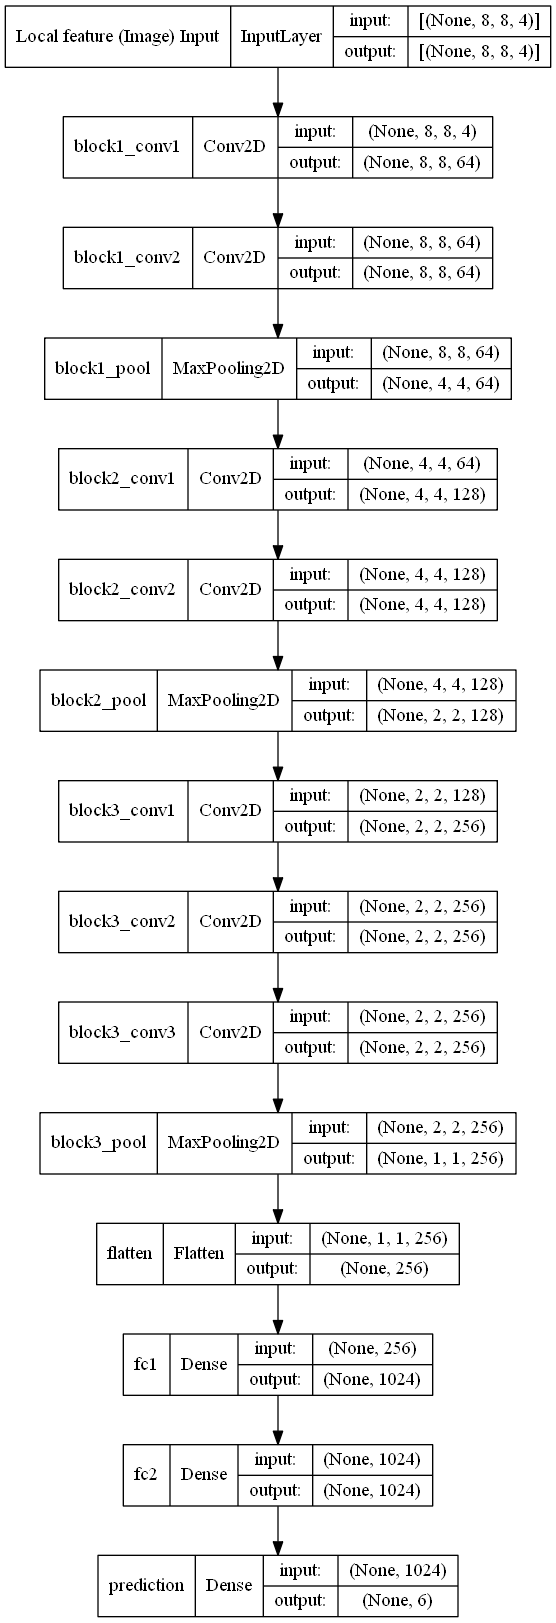

In [33]:
# 모델 도면 출력
plot_model(modified_VGG16_model, 'modified_VGG16_model.png', show_shapes = True)

In [34]:
print(local_X_train.shape)
print(local_X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 8, 8, 4)
(300, 8, 8, 4)
(2400,)
(300,)


In [35]:
# 모델 학습
modified_VGG16_model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

if is_global_feature:
    modified_VGG16_model.fit([local_X_train, global_X_train], y_train, epochs = epoch_num)
    modified_VGG16_model.evaluate([local_X_test, global_X_test], y_test, verbose = 2)
else:
    modified_VGG16_model.fit(local_X_train, y_train, epochs = epoch_num)
    modified_VGG16_model.evaluate(local_X_test, y_test, verbose = 2)

Epoch 1/20
75/75 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.0029
Epoch 2/20
75/75 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/20
75/75 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/20
75/75 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/20
75/75 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/20
75/75 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/20
75/75 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/20
75/75 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/20
75/75 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/20
75/75 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 11/20
7

In [36]:
# 모델의 Feature list 확인
modified_VGG16_features_list = [layer.output for layer in modified_VGG16_model.layers]
modified_VGG16_features_list

[<KerasTensor: shape=(None, 8, 8, 4) dtype=float32 (created by layer 'Local feature (Image) Input')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 4, 4, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 2, 2, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 2, 2, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 2, 2, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 2, 2, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 1, 1, 256) dtype=float32 (created by layer 'block3_pool')>,
 <KerasTensor:

In [37]:
modified_VGG16_feat_extraction_model = Model(inputs = modified_VGG16_model.input, outputs = modified_VGG16_features_list)

if is_global_feature == True:
    train_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_train, global_X_train])
    test_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_test, global_X_test])
#     val_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model([local_X_val, global_X_val])
else: 
    train_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_train)
    test_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_test)
#     val_modified_VGG16_extracted_features = modified_VGG16_feat_extraction_model(local_X_val)

In [38]:
train_modified_VGG16_representations = np.array(train_modified_VGG16_extracted_features[0], dtype = object)
test_modified_VGG16_representations = np.array(test_modified_VGG16_extracted_features[0], dtype = object)
# val_modified_VGG16_representations = np.array(val_modified_VGG16_extracted_features[-2], dtype = object)
print(type(train_modified_VGG16_representations))
print(train_modified_VGG16_representations.shape)
train_modified_VGG16_representations

<class 'numpy.ndarray'>
(2400, 8, 8, 4)


array([[[[0.0, 0.0, 0.49803921580314636, 0.0],
         [0.0, 0.0, 0.49803921580314636, 0.0],
         [0.0, 0.0, 0.49803921580314636, 0.0],
         ...,
         [0.0, 0.054901961237192154, 0.49803921580314636, 0.0],
         [0.0, 0.0, 0.49803921580314636, 0.0],
         [0.0, 0.0, 0.49803921580314636, 0.0]],

        [[0.0, 0.0, 0.49803921580314636, 0.0],
         [0.0, 0.0, 0.49803921580314636, 0.0],
         [0.0, 0.0313725508749485, 0.49803921580314636, 0.0],
         ...,
         [0.23529411852359772, 0.10980392247438431, 0.2235294133424759,
          0.0],
         [0.0, 0.07058823853731155, 0.3019607961177826, 0.0],
         [0.0, 0.0, 0.49803921580314636, 0.0]],

        [[0.0, 0.0, 0.49803921580314636, 0.0],
         [0.0, 0.0, 0.49803921580314636, 0.0],
         [0.0, 0.07058823853731155, 0.49803921580314636, 0.0],
         ...,
         [0.33725491166114807, 0.14509804546833038, 0.2823529541492462,
          0.0],
         [0.16862745583057404, 0.12941177189350128,
     

In [39]:
dummy_modified_VGG16_representations = np.array(train_modified_VGG16_extracted_features[1], dtype = object)
print(type(dummy_modified_VGG16_representations))
print(dummy_modified_VGG16_representations.shape)
dummy_modified_VGG16_representations

<class 'numpy.ndarray'>
(2400, 8, 8, 64)


array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan

## (2) 분류 예측 및 예외 처리

In [40]:
# K-Neighbors 
KN_classifier = KNeighborsClassifier(n_neighbors = 3, p=2, metric = 'minkowski')
KN_classifier.fit(train_modified_VGG16_representations, y_train)

# Decision tree
DT_classifier = DecisionTreeClassifier(random_state = classifier_random_state)   ## 모델 지정
DT_classifier.fit(train_modified_VGG16_representations, y_train)


# Random forest
RF_classifier = RandomForestClassifier(random_state = classifier_random_state)   ## 모델 지정
RF_classifier.fit(train_modified_VGG16_representations, y_train)


# Support vector machine
SVM_classifier = svm.SVC(random_state = classifier_random_state, kernel = 'linear', C = 10)   ## C가 클수록 정확해짐
SVM_classifier.fit(train_modified_VGG16_representations, y_train)


# Stochastic gradient descent
SGD_classifier = SGDClassifier(random_state = classifier_random_state)   ## 모델 지정
SGD_classifier.fit(train_modified_VGG16_representations, y_train)


# Logistic regression
LR_classifier = LogisticRegression(random_state = classifier_random_state, max_iter = 5000)   ## 모델 지정
LR_classifier.fit(train_modified_VGG16_representations, y_train)

# Multinomial Naive Bayes
MNB_classifier = MultinomialNB()   ## 모델 지정
MNB_classifier.fit(train_modified_VGG16_representations, y_train)


ValueError: Found array with dim 4. Estimator expected <= 2.

In [ ]:
print('*** K-Neighbors classifier result ***')
KN_y_pred = KN_classifier.predict(val_modified_VGG16_representations)
KN_report = classification_report(y_test, KN_y_pred)
print(KN_report)

print('*** Decision tree classifier result ***')
DT_y_pred = DT_classifier.predict(val_modified_VGG16_representations)
DT_report = classification_report(y_test, DT_y_pred)
print(DT_report)

print('*** Random forest classifier result ***')
RF_y_pred = RF_classifier.predict(val_modified_VGG16_representations)
RF_report = classification_report(y_test, RF_y_pred)
print(RF_report)

print('*** Support vector machine classifier result ***')
SVM_y_pred = SVM_classifier.predict(val_modified_VGG16_representations)
SVM_report = classification_report(y_test, SVM_y_pred)
print(SVM_report)

print('*** Stochastic gradient descent classifier result ***')
SGD_y_pred = SGD_classifier.predict(val_modified_VGG16_representations)
SGD_report = classification_report(y_test, SGD_y_pred)
print(SGD_report)

print('*** Logistic regression classifier result ***')
LR_y_pred = LR_classifier.predict(val_modified_VGG16_representations)
LR_report = classification_report(y_test, LR_y_pred)
print(LR_report)

print('*** Multinomial Naive Bayes classifier result ***')
MNB_y_pred = MNB_classifier.predict(val_modified_VGG16_representations)
MNB_report = classification_report(y_test, LR_y_pred)
print(MNB_report)


## (3) 결과 시각화
### Confusion matrix

In [ ]:
# Confusion matrix 계산 및 히트맵 시각화

KN_cm = confusion_matrix(y_test, KN_y_pred)
DT_cm = confusion_matrix(y_test, DT_y_pred)
RF_cm = confusion_matrix(y_test, RF_y_pred)
SVM_cm = confusion_matrix(y_test, SVM_y_pred)
SGD_cm = confusion_matrix(y_test, SGD_y_pred)
LR_cm = confusion_matrix(y_test, LR_y_pred)
MNB_cm = confusion_matrix(y_test, MNB_y_pred)



sns.set(rc = {'figure.figsize':(15,15)})
fig, axes = plt.subplots(nrows = 4, ncols = 2)
sns.heatmap(KN_cm/np.sum(KN_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[0,0])
sns.heatmap(DT_cm/np.sum(DT_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[0,1])
sns.heatmap(RF_cm/np.sum(RF_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[1,0])
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[1,1])
sns.heatmap(SGD_cm/np.sum(SGD_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[2,0])
sns.heatmap(LR_cm/np.sum(LR_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[2,1])
sns.heatmap(MNB_cm/np.sum(MNB_cm), annot=True, fmt='.2%', cmap='Blues', ax = axes[3,0])
    

### TSNE

In [ ]:
# representation 벡터 형태 변환
train_df = pd.DataFrame(train_modified_VGG16_representations)

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

df_y = np.array(y_train)
df_y = pd.DataFrame(df_y)
tsne_df['target'] = pd.DataFrame(df_y)

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]
tsne_df_3 = tsne_df[tsne_df['target'] == 3]
tsne_df_4 = tsne_df[tsne_df['target'] == 4]
tsne_df_5 = tsne_df[tsne_df['target'] == 5]

In [ ]:
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'SDW')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'PSH')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'LTS')
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], color = 'red', label = 'CJH')
plt.scatter(tsne_df_4['component 0'], tsne_df_4['component 1'], color = 'blue', label = 'LCY')
plt.scatter(tsne_df_5['component 0'], tsne_df_5['component 1'], color = 'green', label = 'HHY')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()
plt.savefig('tsne_sample.png')

In [ ]:
from metric_learn import LMNN
from metric_learn import NCA
from metric_learn import LFDA
from metric_learn import MLKR
from metric_learn import MMC_Supervised


lmnn = LMNN(k=5, learn_rate=1e-6)
lmnn.fit(train_modified_VGG16_representations, y_train)

In [ ]:
nca = NCA(max_iter=1000)
nca.fit(train_modified_VGG16_representations, y_train)

In [ ]:
lfda = LFDA(k=2)
lfda.fit(train_modified_VGG16_representations, y_train)

In [ ]:
mlkr = MLKR()
mlkr.fit(train_modified_VGG16_representations, y_train)

In [ ]:
mmc = MMC_Supervised(num_constraints=200)
mmc.fit(train_modified_VGG16_representations, y_train)